1. Clone repos and install requirements

In [1]:
# !git clone https://github.com/CompVis/latent-diffusion.git
# !git clone https://github.com/CompVis/taming-transformers
# !pip3 install -e ./taming-transformers
# !pip3 install ipywidgets omegaconf>=2.0.0 pytorch-lightning>=1.0.8 torch-fidelity einops

import sys, os
sys.path.append(".")
sys.path.append('./taming-transformers')
from taming.models import vqgan # checking correct import from taming

2. Define the Task (currently only superresolution is available, other tasks are coming soon)



In [2]:
%cd latent-diffusion
import ipywidgets as widgets
from IPython.display import display

mode = widgets.Select(options=['superresolution'],
    value='superresolution', description='Task:')
display(mode)

/Users/davidchen/Desktop/stable-diffusion/latent-diffusion


Select(description='Task:', options=('superresolution',), value='superresolution')

3. Download model checkpoint ( takes ~ 3 Min) and load model


In [3]:
from notebook_helpers import get_model
model = get_model(mode.value)

Using downloaded and verified file: logs/diffusion/superresolution_bsr/configs/project.yaml/?dl=1
Using downloaded and verified file: logs/diffusion/superresolution_bsr/checkpoints/last.ckpt/?dl=1
Loading model from logs/diffusion/superresolution_bsr/checkpoints/last.ckpt/?dl=1
LatentDiffusion: Running in eps-prediction mode
|- THE UNET MODEL THAT IS BEING USED
DiffusionWrapper has 113.62 M params.
Keeping EMAs of 308.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


4. Optional step: Upload your own conditioning image for superresolution (height and width have to take values in [128, 192, 256])

In [4]:
# from notebook_helpers import get_custom_cond
# get_custom_cond(mode.value)

4. Select conditioning from available examples or the uploaded custom conditioning

In [5]:
# # To change image, change the "data/example_conditioning/superresolution/" under "latent-diffusion"
from notebook_helpers import get_cond_options, get_cond
dir, _ = get_cond_options(mode.value)
print(dir)
cond_choice = os.listdir(dir)

data/example_conditioning/superresolution


5. Run Model

Running on ['sample_0.jpg', 'img1.jpg', '2.jpg']


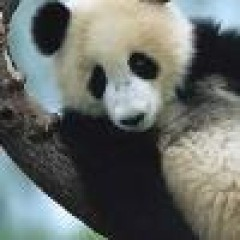

Running superresolution with data/example_conditioning/superresolution/2.jpg with model: LatentDiffusion(
  (model): DiffusionWrapper(
    (diffusion_model): UNetModel(
      (time_embed): Sequential(
        (0): Linear(in_features=160, out_features=640, bias=True)
        (1): SiLU()
        (2): Linear(in_features=640, out_features=640, bias=True)
      )
      (input_blocks): ModuleList(
        (0): TimestepEmbedSequential(
          (0): Conv2d(6, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1-2): 2 x TimestepEmbedSequential(
          (0): ResBlock(
            (in_layers): Sequential(
              (0): GroupNorm32(32, 160, eps=1e-05, affine=True)
              (1): SiLU()
              (2): Conv2d(160, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            )
            (h_upd): Identity()
            (x_upd): Identity()
            (emb_layers): Sequential(
              (0): SiLU()
              (1): Linear(in_features=640, out_feat

In [6]:
from notebook_helpers import run
import os
custom_steps = 100
print("Running on", cond_choice)

## David:
## Running the data in ldm/ data/example_conditioning/superresolution/
## This cond_choice is just manually reorder/ specify which image to run
##
cond_choice = [ '2.jpg']

for im in cond_choice:
    cond_choice_path = os.path.join(dir, im)
    logs = run(model["model"], cond_choice_path, mode.value, custom_steps)

6. Display Sample

(1, 1024, 1024, 3)


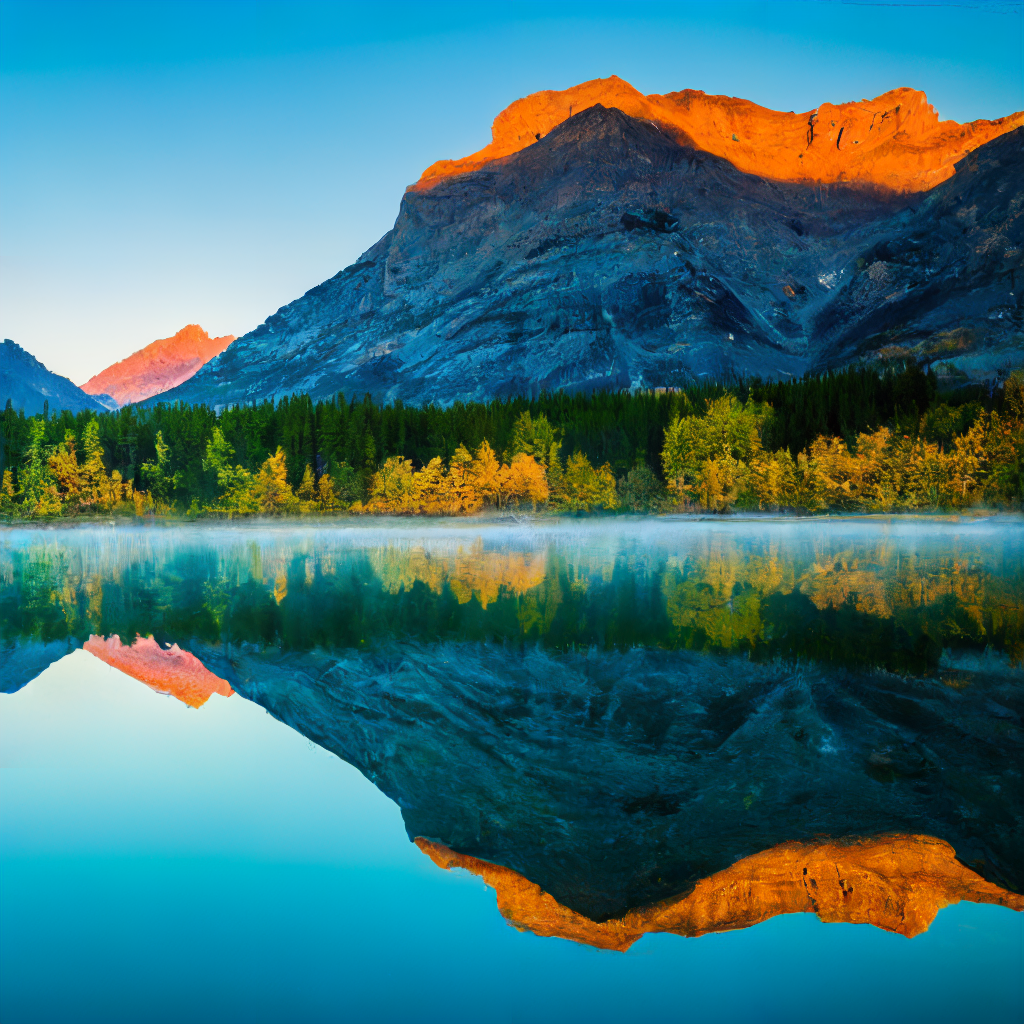

In [ ]:
import torch
import numpy as np
import IPython.display as d
from PIL import Image

sample = logs["sample"]
sample = sample.detach().cpu()
sample = torch.clamp(sample, -1., 1.)
sample = (sample + 1.) / 2. * 255
sample = sample.numpy().astype(np.uint8)
sample = np.transpose(sample, (0, 2, 3, 1))
print(sample.shape)
a = Image.fromarray(sample[0])
#store image
a.save("test.jpg")
display(a)
